In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [282]:
insurance_df = pd.read_csv('insurance_claims.csv')
insurance_df.head(5)

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [283]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

# EDA

In [284]:
# Exploring target variable distribution
print(insurance_df['claim_status'].value_counts())

claim_status
0    54844
1     3748
Name: count, dtype: int64


In [285]:
# Dropping irrelevant columns
drop_cols = [
    'policy_id',
    'model',
    'turning_radius',
    'length',
    'width',
    'is_rear_window_wiper',
    'is_rear_window_washer',
    'is_rear_window_defogger',
    'is_day_night_rear_view_mirror',
    'is_speed_alert'
]
insurance_df.drop(columns=drop_cols, inplace=True)

In [286]:

insurance_df.describe()

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,gross_weight,ncap_rating,claim_status
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,6.111688,1.388473,44.823935,18826.858667,3.137066,1162.355851,3.626963,1385.276813,1.759950,0.063968
std,4.142790,1.134413,6.935604,17660.174792,1.832641,266.304786,0.483616,212.423085,1.389576,0.244698
min,0.000000,0.000000,35.000000,290.000000,1.000000,796.000000,3.000000,1051.000000,0.000000,0.000000
25%,2.100000,0.400000,39.000000,6112.000000,2.000000,796.000000,3.000000,1185.000000,0.000000,0.000000
50%,5.700000,1.200000,44.000000,8794.000000,2.000000,1197.000000,4.000000,1335.000000,2.000000,0.000000
75%,10.400000,2.200000,49.000000,27003.000000,6.000000,1493.000000,4.000000,1510.000000,3.000000,0.000000
max,14.000000,20.000000,75.000000,73430.000000,6.000000,1498.000000,4.000000,1720.000000,5.000000,1.000000


In [287]:
# [insurance_df['vehicle_age']]
q3 = np.percentile(insurance_df['vehicle_age'], 75)
q1 = np.percentile(insurance_df['vehicle_age'], 25)

iqr = q3 - q1
upper = q3 + 1.5*iqr
print(upper)

filtered = insurance_df[insurance_df['vehicle_age'] > upper]
print(filtered.count())

4.9
subscription_length                 269
vehicle_age                         269
customer_age                        269
region_code                         269
region_density                      269
segment                             269
fuel_type                           269
max_torque                          269
max_power                           269
engine_type                         269
airbags                             269
is_esc                              269
is_adjustable_steering              269
is_tpms                             269
is_parking_sensors                  269
is_parking_camera                   269
rear_brakes_type                    269
displacement                        269
cylinder                            269
transmission_type                   269
steering_type                       269
gross_weight                        269
is_front_fog_lights                 269
is_brake_assist                     269
is_power_door_locks                 

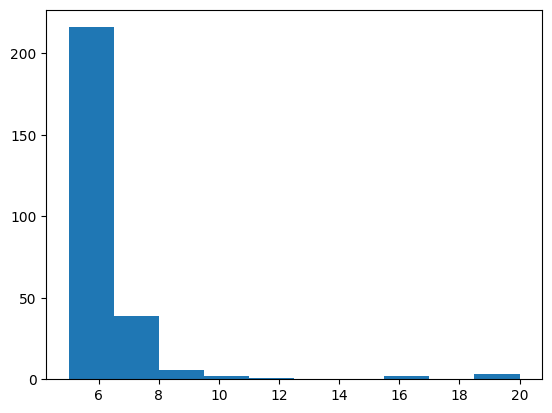

In [288]:
plt.hist(filtered['vehicle_age'], bins=10)
plt.show()

In [289]:
insurance_df = insurance_df[insurance_df['vehicle_age'] < 8]
insurance_df.describe()



,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,gross_weight,ncap_rating,claim_status
count,58578.000000,58578.000000,58578.000000,58578.000000,58578.000000,58578.000000,58578.000000,58578.000000,58578.000000,58578.000000
mean,6.110939,1.385766,44.823398,18829.204223,3.136946,1162.334306,3.626942,1385.248711,1.759859,0.063983
std,4.142786,1.118744,6.935739,17661.269782,1.832568,266.308533,0.483622,212.418667,1.389646,0.244725
min,0.000000,0.000000,35.000000,290.000000,1.000000,796.000000,3.000000,1051.000000,0.000000,0.000000
25%,2.100000,0.400000,39.000000,6112.000000,2.000000,796.000000,3.000000,1185.000000,0.000000,0.000000
50%,5.700000,1.200000,44.000000,8794.000000,2.000000,1197.000000,4.000000,1335.000000,2.000000,0.000000
75%,10.400000,2.200000,49.000000,27003.000000,6.000000,1493.000000,4.000000,1510.000000,3.000000,0.000000
max,14.000000,7.800000,75.000000,73430.000000,6.000000,1498.000000,4.000000,1720.000000,5.000000,1.000000


In [290]:
max_torque_list = list(insurance_df['max_torque'].unique())
max_power_list = list(insurance_df['max_power'].unique())

# print(max_pow_list)
# print(max_tor_list)

power_torque_list = []

for r in max_torque_list:
    power = insurance_df[insurance_df['max_torque'] == r]['max_power'].unique()
    power_torque_list.append((list(power)[0], r))

print(power_torque_list)




[('113.45bhp@4000rpm', '250Nm@2750rpm'), ('97.89bhp@3600rpm', '200Nm@1750rpm'), ('40.36bhp@6000rpm', '60Nm@3500rpm'), ('88.77bhp@4000rpm', '200Nm@3000rpm'), ('88.50bhp@6000rpm', '113Nm@4400rpm'), ('55.92bhp@5300rpm', '82.1Nm@3400rpm'), ('67.06bhp@5500rpm', '91Nm@4250rpm'), ('61.68bhp@6000rpm', '85Nm@3000rpm'), ('118.36bhp@5500rpm', '170Nm@4000rpm')]


In [291]:
power_torque_map = {}

for j in range(len(power_torque_list)):
    power_torque_map[power_torque_list[j]] = j+1

print(power_torque_map)

{('113.45bhp@4000rpm', '250Nm@2750rpm'): 1, ('97.89bhp@3600rpm', '200Nm@1750rpm'): 2, ('40.36bhp@6000rpm', '60Nm@3500rpm'): 3, ('88.77bhp@4000rpm', '200Nm@3000rpm'): 4, ('88.50bhp@6000rpm', '113Nm@4400rpm'): 5, ('55.92bhp@5300rpm', '82.1Nm@3400rpm'): 6, ('67.06bhp@5500rpm', '91Nm@4250rpm'): 7, ('61.68bhp@6000rpm', '85Nm@3000rpm'): 8, ('118.36bhp@5500rpm', '170Nm@4000rpm'): 9}


In [292]:
def merge_tor_pow(a, b):
    tup = (a,b)
    return power_torque_map[tup]

insurance_df['power_torque'] = insurance_df.apply(lambda row: merge_tor_pow(row['max_power'], row['max_torque']), axis=1)
print(insurance_df['power_torque'])

insurance_df.drop(columns=['max_power', 'max_torque'], inplace=True)

insurance_df['power_torque'].astype('category')



0        1
1        2
2        1
3        3
4        4
        ..
58587    5
58588    1
58589    5
58590    5
58591    5
Name: power_torque, Length: 58578, dtype: int64


0        1
1        2
2        1
3        3
4        4
        ..
58587    5
58588    1
58589    5
58590    5
58591    5
Name: power_torque, Length: 58578, dtype: category
Categories (9, int64): [1, 2, 3, 4, ..., 6, 7, 8, 9]

In [293]:
insurance_df.describe()

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,gross_weight,ncap_rating,claim_status,power_torque
count,58578.000000,58578.000000,58578.000000,58578.000000,58578.000000,58578.000000,58578.000000,58578.000000,58578.000000,58578.000000,58578.000000
mean,6.110939,1.385766,44.823398,18829.204223,3.136946,1162.334306,3.626942,1385.248711,1.759859,0.063983,3.636177
std,4.142786,1.118744,6.935739,17661.269782,1.832568,266.308533,0.483622,212.418667,1.389646,0.244725,1.964180
min,0.000000,0.000000,35.000000,290.000000,1.000000,796.000000,3.000000,1051.000000,0.000000,0.000000,1.000000
25%,2.100000,0.400000,39.000000,6112.000000,2.000000,796.000000,3.000000,1185.000000,0.000000,0.000000,2.000000
50%,5.700000,1.200000,44.000000,8794.000000,2.000000,1197.000000,4.000000,1335.000000,2.000000,0.000000,3.000000
75%,10.400000,2.200000,49.000000,27003.000000,6.000000,1493.000000,4.000000,1510.000000,3.000000,0.000000,5.000000
max,14.000000,7.800000,75.000000,73430.000000,6.000000,1498.000000,4.000000,1720.000000,5.000000,1.000000,9.000000


In [294]:
insurance_df['region_code'] = insurance_df['region_code'].astype('category')
insurance_df['segment'] = insurance_df['segment'].astype('category')
insurance_df['airbags'] = insurance_df['airbags'].astype('category')

insurance_df.columns

for col in insurance_df.columns:
    if col[:2] == 'is':
        insurance_df[col] = insurance_df[col].astype('category')
    if col[-4:] == 'type':
        insurance_df[col] = insurance_df[col].astype('category')


In [295]:
insurance_df.describe()

,subscription_length,vehicle_age,customer_age,region_density,displacement,cylinder,gross_weight,ncap_rating,claim_status,power_torque
count,58578.000000,58578.000000,58578.000000,58578.000000,58578.000000,58578.000000,58578.000000,58578.000000,58578.000000,58578.000000
mean,6.110939,1.385766,44.823398,18829.204223,1162.334306,3.626942,1385.248711,1.759859,0.063983,3.636177
std,4.142786,1.118744,6.935739,17661.269782,266.308533,0.483622,212.418667,1.389646,0.244725,1.964180
min,0.000000,0.000000,35.000000,290.000000,796.000000,3.000000,1051.000000,0.000000,0.000000,1.000000
25%,2.100000,0.400000,39.000000,6112.000000,796.000000,3.000000,1185.000000,0.000000,0.000000,2.000000
50%,5.700000,1.200000,44.000000,8794.000000,1197.000000,4.000000,1335.000000,2.000000,0.000000,3.000000
75%,10.400000,2.200000,49.000000,27003.000000,1493.000000,4.000000,1510.000000,3.000000,0.000000,5.000000
max,14.000000,7.800000,75.000000,73430.000000,1498.000000,4.000000,1720.000000,5.000000,1.000000,9.000000


In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

for col in insurance_df.columns:
    if insurance_df[col].dtype == 'category':
        encoded_array = ohe.fit_transform(insurance_df[[col]])
        # vals = sorted(list(insurance_df[col].unique()))
        feature_names = ohe.get_feature_names_out([col])
        df_ohe = pd.DataFrame(encoded_array, columns=feature_names, index=insurance_df.index)
        insurance_df = pd.concat([insurance_df.drop(columns=[col]), df_ohe], axis=1)



In [300]:
insurance_df

,subscription_length,vehicle_age,customer_age,region_density,displacement,cylinder,gross_weight,ncap_rating,claim_status,power_torque,...,is_power_door_locks_No,is_power_door_locks_Yes,is_central_locking_No,is_central_locking_Yes,is_power_steering_No,is_power_steering_Yes,is_driver_seat_height_adjustable_No,is_driver_seat_height_adjustable_Yes,is_ecw_No,is_ecw_Yes
0,9.3,1.2,41,8794,1493,4,1720,3,0,1,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,8.2,1.8,35,27003,1498,4,1051,4,0,2,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,9.5,0.2,44,8794,1493,4,1720,3,0,1,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,5.2,0.4,44,73430,796,3,1185,0,0,3,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,10.1,1.0,56,5410,1497,4,1490,5,0,4,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,10.6,2.6,48,34738,1197,4,1335,2,0,5,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
58588,2.3,2.2,37,4076,1493,4,1720,3,0,1,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
58589,6.6,2.2,35,8794,1197,4,1335,2,0,5,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
58590,4.1,3.6,44,8794,1197,4,1335,2,0,5,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
